## Upper Conficence Bound

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Importing dataset

In [0]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset

## Implementing Random Selection

In [4]:
import random
N = 10000
d =10
ads_selected = []
total_reward = 0
for n in range(0,N):
  ad = random.randrange(d)
  ads_selected.append(ad)
  reward = dataset.values[n , ad]
  total_reward = total_reward + reward

total_reward

1236

## Implementing UCB

In [0]:
import math

numbers_of_selections = [0] * d
sums_of_reward = [0] * d
ads_select = []
total_reward = 0
for n in range(0 , N):
  ad = 0
  max_upper_bound = 0
  for i in range(0 , d):
    if(numbers_of_selections[i] > 0):
      average_reward = sums_of_reward[i] / numbers_of_selections[i]
      delta_i = math.sqrt(1.5 * math.log(n +1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if(upper_bound > max_upper_bound):
        max_upper_bound = upper_bound
        ad = i
  ads_select.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n , ad]
  sums_of_reward[ad] = sums_of_reward[ad] + reward
  total_reward = total_reward + reward


ads_select



## Visualizing the Algorithm

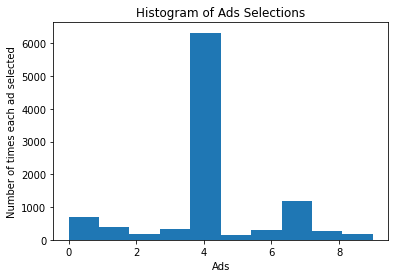

In [11]:
plt.hist(ads_select)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad selected')
plt.show()